## Metricas sacadas a partir del modelo

In [13]:
import psycopg2
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import json

Hice uso de las librerias de psycopg2, pandas, sklearn.metrics, seaborn, matplotlib y json.

In [9]:
with open("C:/Users/kevin/ETL/workshop_03/data_streaming/services/df_config.json") as config_file:
    db_config = json.load(config_file)
    
conn = psycopg2.connect(
            host='localhost',
            user=db_config['user'],
            password=db_config['password'],
            database='happiness'
        )

query = "SELECT happiness_test, happiness_prediction FROM happiness_predictions;"

cursor = conn.cursor()
cursor.execute(query)
data = cursor.fetchall()
data = pd.DataFrame(data, columns=['happiness_test', 'happiness_prediction'])

Hago la conexion con la base de datos de postgresql, y selecciono las vairables de la prediccion y el testing.

In [10]:
r2 = r2_score(data['happiness_test'], data['happiness_prediction'])
mse = mean_squared_error(data['happiness_test'], data['happiness_prediction'])
rmse = mean_squared_error(data['happiness_test'], data['happiness_prediction'], squared=False)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 0.7032730315721939
MSE: 0.40783012953633313
RMSE: 0.6386157917999938


Estas son las metricas que saque

R2 o coeficiente de determinacion: Significa que alrededor del 70.3% de la variabilidad de la variable dependiente ha sido explicada por el modelo. En términos generales, es un valor aceptable. Cuanto más cercano a 1 esté el R2, mejor será la capacidad del modelo para explicar la variabilidad en los datos.

MSE o error cuadratico medio: El modelo tiene un error de aproximadamente 0.408 unidades al cuadrado en la escala original de las respuestas. Valores más bajos indican un mejor ajuste del modelo a los datos.

RMSE o Error Cuadrático Medio de la Raíz Cuadrada: Es simplemente la raíz cuadrada del MSE, lo que te devuelve la misma unidad que los datos originales. En este caso, un valor de aproximadamente 0.639 indica que el modelo tiene un error promedio de alrededor de 0.639 unidades

D:\anaconda\envs\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\envs\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\envs\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\envs\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

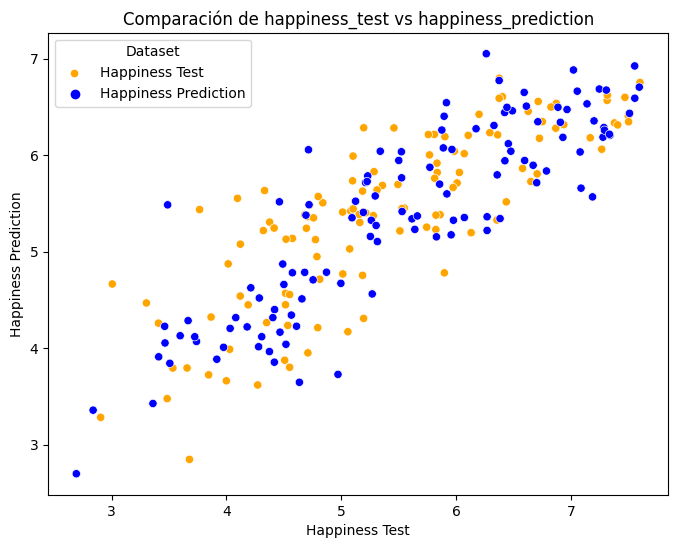

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='happiness_test', y='happiness_prediction', data=data, hue=data.index < len(data) // 2, palette=['blue', 'orange'])
plt.title('Comparación de happiness_test vs happiness_prediction')
plt.xlabel('Happiness Test')
plt.ylabel('Happiness Prediction')
plt.legend(title='Dataset', labels=['Happiness Test', 'Happiness Prediction'])
plt.show()

conn.close()